In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [28]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
print(df.head(5))


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [4]:
df.shape

(11251, 15)

In [5]:
df.drop(['Status','unnamed1'], axis=1 , inplace=True)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
 pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [29]:
df.shape

(11251, 15)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

In [10]:
df['Amount']=df['Amount'].astype(int)

In [11]:
df['Amount'].dtypes

dtype('int64')

In [12]:
df.rename(columns={'Marital_Status':'Single'},inplace=True)

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Single', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [14]:
df.describe()

,User_ID,Age,Single,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


Exploratory Data Analytics

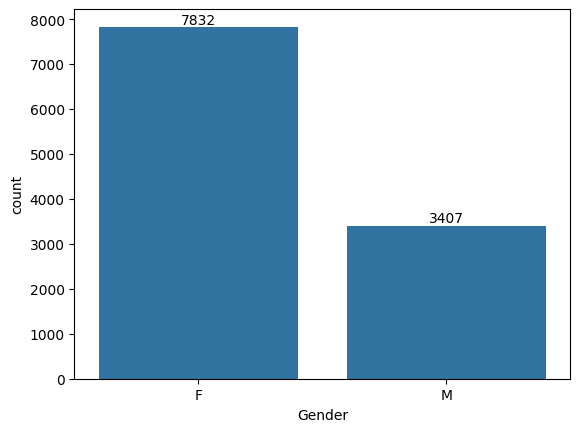

In [16]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

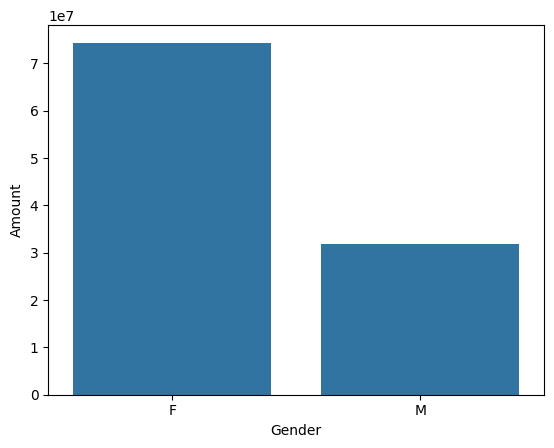

In [17]:
# Gender-wise total sales
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Bar plot
sns.barplot(x='Gender', y='Amount', data=sales_gen)

plt.show()

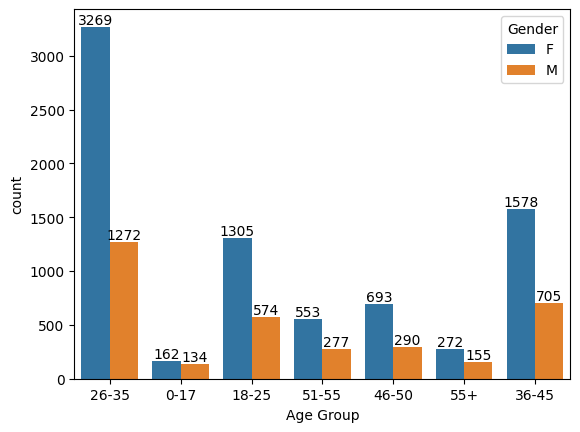

In [18]:
ax=sns.countplot(data=df, x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


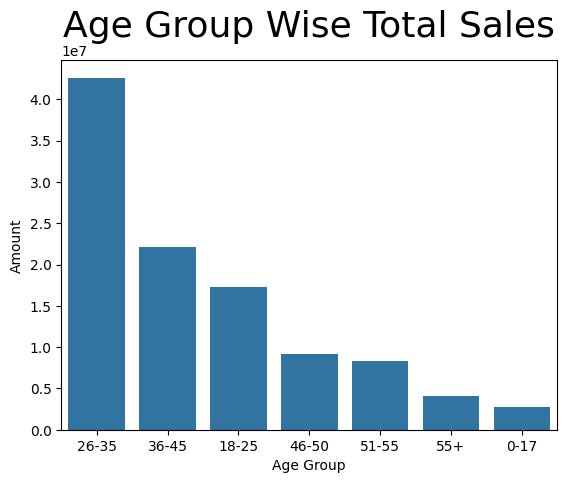

In [19]:
# Age group wise total sales
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
# Bar plot
sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title("Age Group Wise Total Sales",fontsize=26)
plt.show()

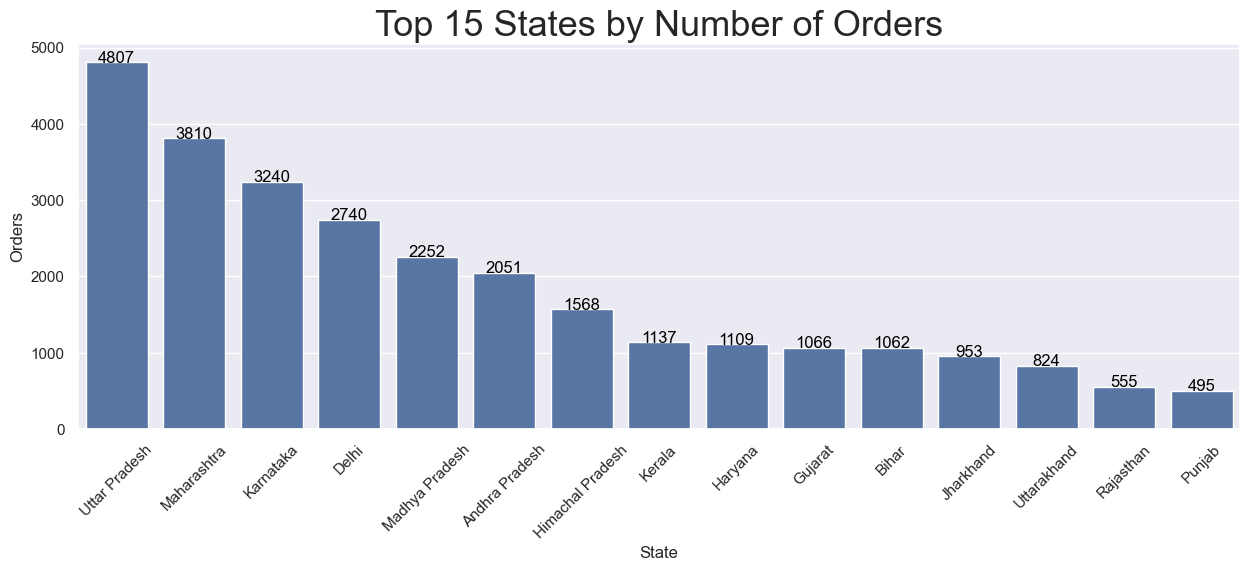

In [20]:
# State wise orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(15)

# Bar plot
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='State', y='Orders', data=sales_state)

plt.xticks(rotation=45)
plt.title("Top 15 States by Number of Orders", fontsize=26)

# 🔹 Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,   # x position (center of bar)
            p.get_height() + 1,              # y position (just above bar)
            int(p.get_height()),             # text = height (order count)
            ha='center', fontsize=12, color='black')  # alignment & style

plt.show()


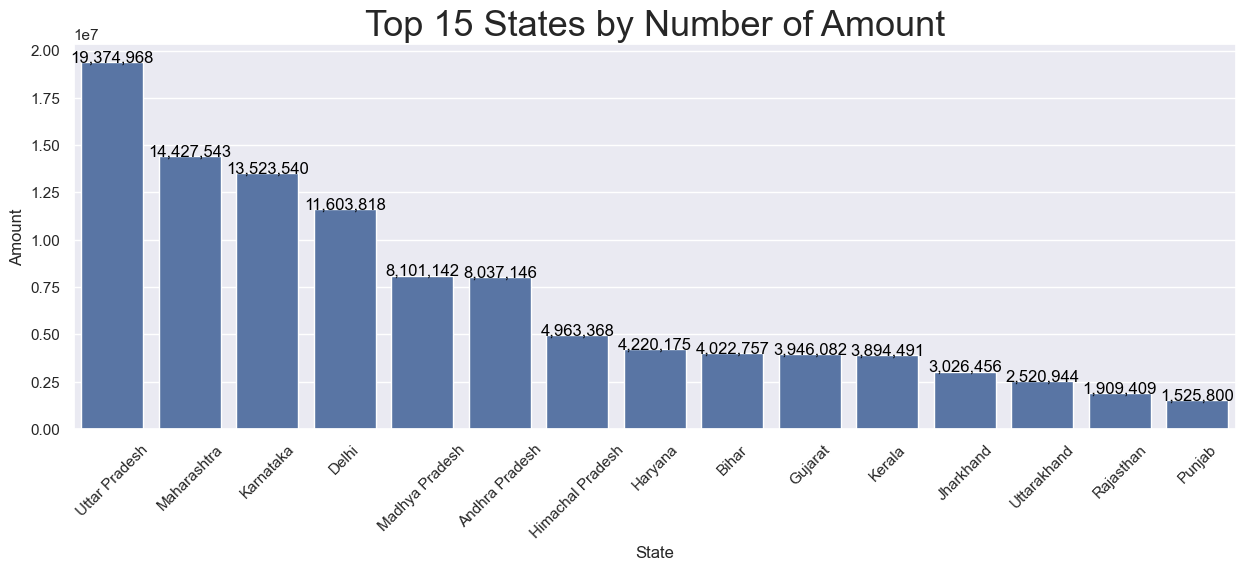

In [21]:
# State wise sales in amount
Total_Sales_in_Amounnt_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(15)

# Bar plot
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='State', y='Amount', data=Total_Sales_in_Amounnt_state)

plt.xticks(rotation=45)
plt.title("Top 15 States by Number of Amount", fontsize=26)

# 🔹 Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,   # x position (center of bar)
            p.get_height() + 1,              # y position (just above bar)
            f"{int(p.get_height()):,}",             # text = height (order count)
            ha='center', fontsize=12, color='black')  # alignment & style

plt.show()


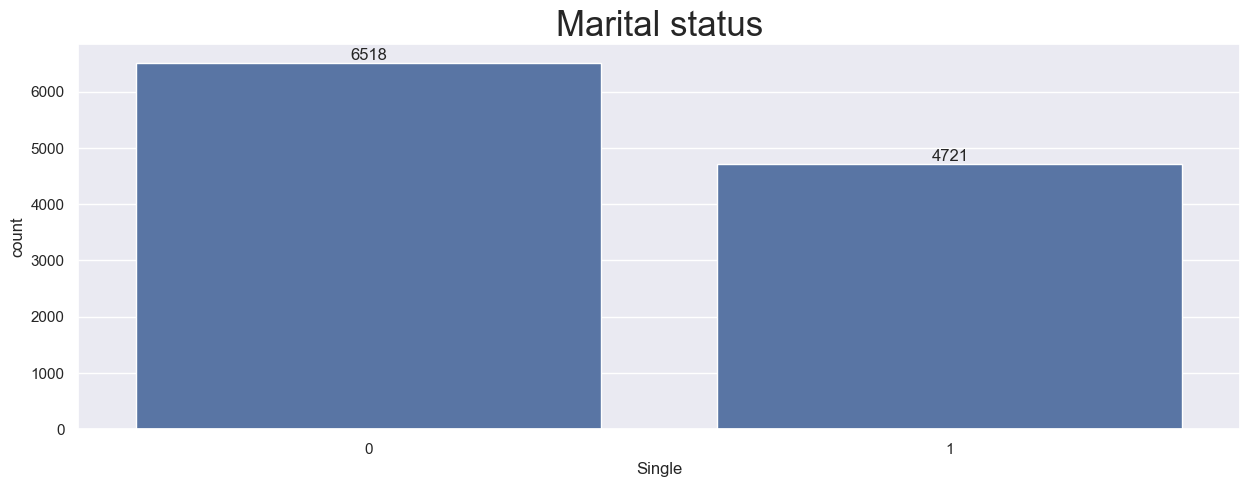

In [22]:
ax=sns.countplot(data=df ,x='Single')
for bars in ax.containers:
    plt.title("Marital status",fontsize=25)
    ax.bar_label(bars)

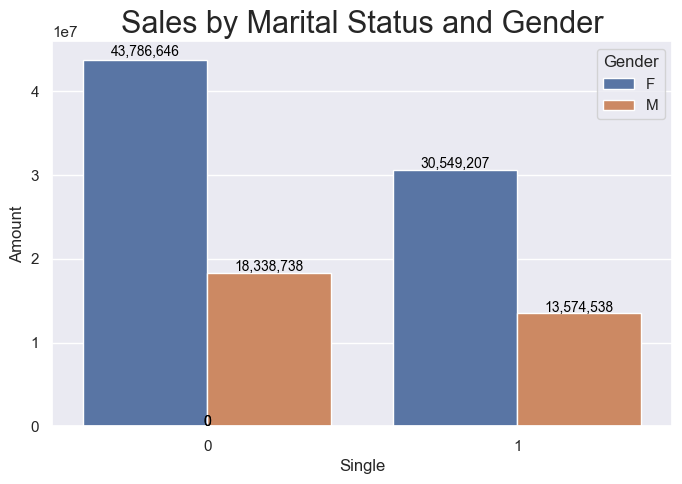

In [23]:
# State wise sales by Marital Status and Gender
Marital_status_state = df.groupby(['Single', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Bar plot
sns.set(rc={'figure.figsize': (8,5)})
ax = sns.barplot(x='Single', y='Amount', hue='Gender', data=Marital_status_state)

plt.xticks(rotation=0)
plt.title("Sales by Marital Status and Gender", fontsize=22)

# 🔹 Add amount labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + (p.get_height()*0.01),   # little above the bar
            f"{int(p.get_height()):,}", 
            ha='center', fontsize=10, color='black')

plt.show()


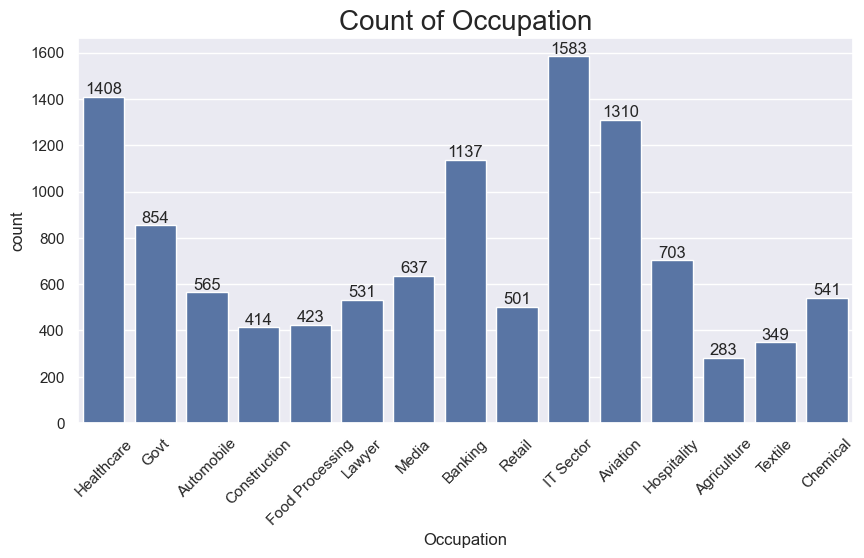

In [24]:

sns.set(rc={'figure.figsize': (10,5)})
ax = sns.countplot(data=df, x='Occupation')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 

plt.xticks(rotation=45)
plt.title("Count of Occupation", fontsize=20)
plt.show()


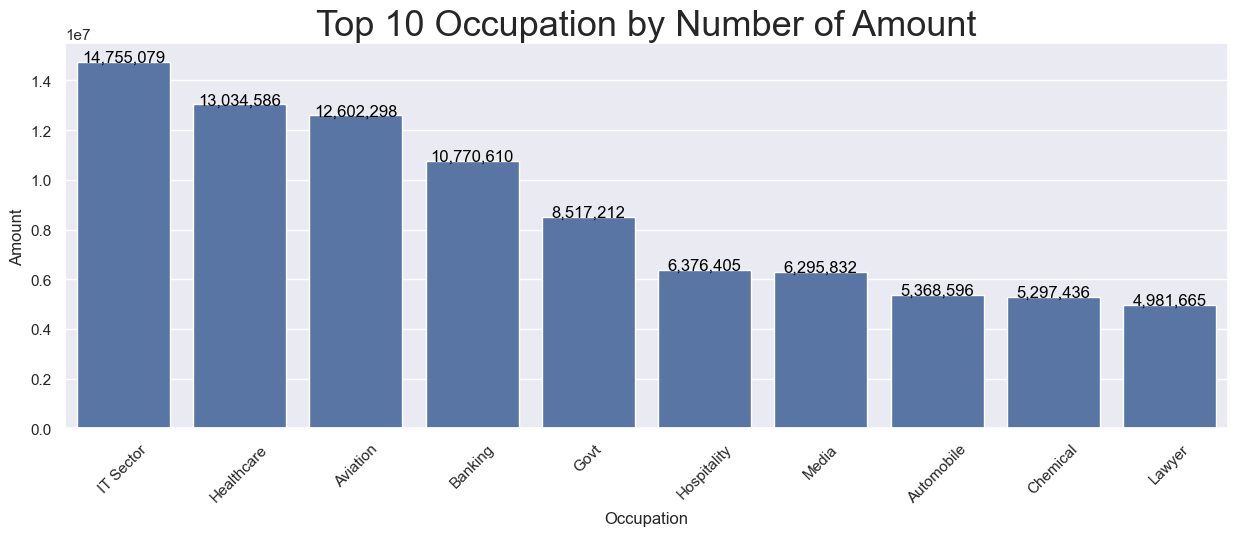

In [25]:
# occupation wise sales in amount
Total_Sales_in_Amounnt_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Bar plot
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='Occupation', y='Amount', data=Total_Sales_in_Amounnt_occupation)

plt.xticks(rotation=45)
plt.title("Top 10 Occupation by Number of Amount", fontsize=26)

# 🔹 Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,   # x position (center of bar)
            p.get_height() + 1,              # y position (just above bar)
            f"{int(p.get_height()):,}",             # text = height (order count)
            ha='center', fontsize=12, color='black')  # alignment & style

plt.show()


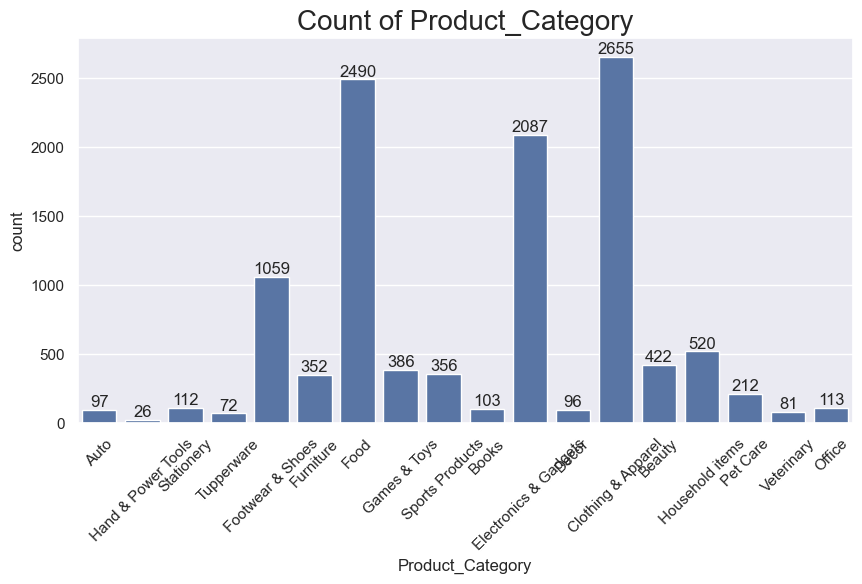

In [26]:

sns.set(rc={'figure.figsize': (10,5)})
ax = sns.countplot(data=df, x='Product_Category')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 

plt.xticks(rotation=45)
plt.title("Count of Product_Category", fontsize=20)
plt.show()


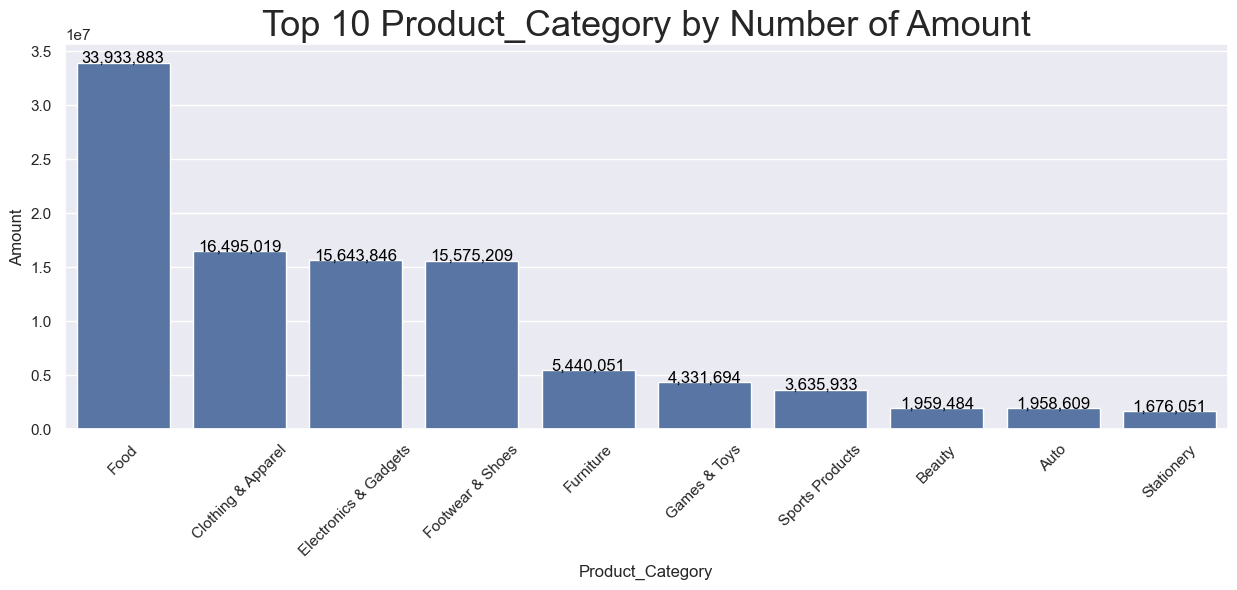

In [27]:
# Product category wise sales in amount
Total_Sales_in_Amounnt_Product_Category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Bar plot
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='Product_Category', y='Amount', data=Total_Sales_in_Amounnt_Product_Category)

plt.xticks(rotation=45)
plt.title("Top 10 Product_Category by Number of Amount", fontsize=26)

# 🔹 Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,   # x position (center of bar)
            p.get_height() + 1,              # y position (just above bar)
            f"{int(p.get_height()):,}",             # text = height (order count)
            ha='center', fontsize=12, color='black')  # alignment & style

plt.show()
